In [1]:
data_folder = '/disk1/workspace/20230828/RAA_10/ref_raa_variation_7_random_south'
band3_raa_sr_npy = data_folder + '/26_0_band3_ref_raa_variation_RAA.npy'
band4_raa_sr_npy = data_folder + '/26_0_band4_ref_raa_variation_RAA.npy'

In [7]:
import os
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import math

In [39]:
band3_raa_sr = numpy.load(band3_raa_sr_npy, allow_pickle=True)
band4_raa_sr = numpy.load(band4_raa_sr_npy, allow_pickle=True)

In [9]:
def identifer(data):
    down, up = numpy.nanpercentile(data, [0, 75])
    IQR = up-down
    lower_limit = down - 1.5*IQR
    upper_limit = up + 1.5*IQR
    result = numpy.where(data > upper_limit, numpy.nan, data)
    result = numpy.where(result < lower_limit, numpy.nan, result)
    return result

In [49]:
def consistency_para(all_data):

    x_array = all_data[0]
    y_array = all_data[1]
    slope_array = numpy.zeros_like(x_array)*1.
    r_array = numpy.zeros_like(x_array)*1.
    rmse_array = numpy.zeros_like(x_array)*1.
    for v_idx in range(len(x_array)):
        # x_list = x_array[v_idx]
        # y_list = y_array[v_idx]
        X = x_array[v_idx]
        Y = y_array[v_idx]

        # if len(x_list) > 5:
        if len(X) > 40:
            X = numpy.sort(X)
            Y = numpy.sort(Y)
            # filter
            slope_a = [Y[i]/X[i] for i in range(len(X))]
            slope_array_filtered = numpy.array(identifer([slope_a])[0])
            array1_n = (slope_array_filtered*0+1)*numpy.array(X)
            array2_n = (slope_array_filtered*0+1)*numpy.array(Y)
            x_list = array1_n[~numpy.isnan(array1_n)]
            y_list = array2_n[~numpy.isnan(array2_n)]

            k, b = numpy.polyfit(x_list, y_list, deg=1)
            r_, p = pearsonr(x_list, y_list)
            rmse = math.sqrt(mean_squared_error(x_list, y_list))
            slope_array[v_idx] = k
            r_array[v_idx] = r_
            rmse_array[v_idx] = rmse
    return slope_array, r_array, rmse_array

In [50]:
slope_raa, r_raa, rmse_raa = consistency_para(band3_raa_sr)

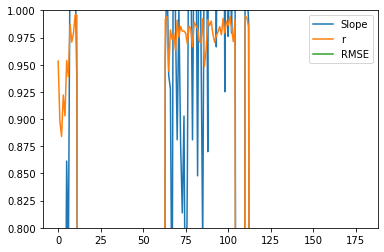

In [57]:
para_array = [slope_raa, r_raa, rmse_raa]
para_name = ['Slope', 'r', 'RMSE']
for para_idx in range(len(para_array)):
    plt.plot(para_array[para_idx], label=para_name[para_idx])
# plt.xlim(60, 120)
# plt.ylim(0, 0.2)
plt.ylim(0.8, 1.0)
plt.legend()